In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns

import sys
sys.path.append('/ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/src/')
import _config

sys.path.append('/home/unix/maxwshen/')
from mylib import util

notebook_nm = 'fig_pb_h2_combine-varynoise'
results_dir = _config.RESULTS_PLACE + f'{notebook_nm}/'
util.ensure_dir_exists(results_dir)

import pb_h2_combine as parent_script

Using data folder:
 /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/data/


In [17]:
modelexp_nm = 'modelexp_varynoisev2_rs'

df = pd.read_csv(parent_script.out_dir + f'{modelexp_nm}.csv', index_col = 0)
df['R2 overall'] = df['Pearsonr (overall)']**2
df.loc[df['data_readlen'] == 1, 'data_readlen'] = 3

print(df.columns)
print(df.shape)

df.to_csv(results_dir + f'{modelexp_nm}.csv')

Index(['Int name', 'Random seed', 'Dataset', 'Pearsonr (overall)',
       'TimewiseR count', 'TimewiseR mean', 'TimewiseR std', 'TimewiseR min',
       'TimewiseR 25%', 'TimewiseR 50%', 'TimewiseR 75%', 'TimewiseR max',
       'data_readlen', 'data_num_proposed_gts', 'data_proposal_type',
       'data_num_groups', 'data_noise', 'data_noiserep', 'R2 overall'],
      dtype='object')
(906, 19)


## plot

Saving to /ahg/regevdata/projects/CRISPR-libraries/prj2/evolution/badran/results/fig_pb_h2_combine-varynoise/varynoise.pdf ...


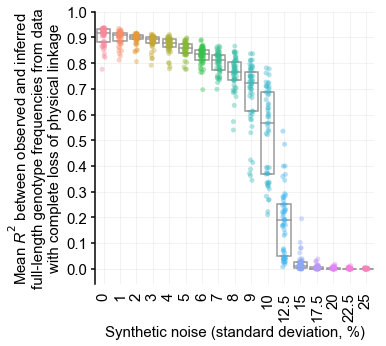

In [43]:
#
import matplotlib
matplotlib.rc('font', family = 'Arial', size = 15)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
#
fig, ax = plt.subplots(figsize = (5, 5))

dfs = df[df['data_readlen'] == 3]
# dfs = dfs[dfs['data_noise'] <= 0.25]

dfs['data_noise_str'] = dfs['data_noise']
# dfs['data_noise_str'] = [100*s for s in dfs['data_noise']]

sns.boxplot(
    x = 'data_noise_str',
    y = 'R2 overall',
    data = dfs,
    color = 'white',
    fliersize = 0,
    ax = ax,
    whis = 0,
)
sns.stripplot(
    x = 'data_noise_str',
    y = 'R2 overall',
    data = dfs,
    alpha = 0.4,
    ax = ax,
)

sns.despine()
ytick_res = 0.1
plt.yticks(np.arange(0, 1 + ytick_res, ytick_res))
plt.grid(alpha = 0.2)

plt.xlabel('Synthetic noise (standard deviation, %)');
plt.ylabel('Mean $R^2$ between observed and inferred\nfull-length genotype frequencies from data\nwith complete loss of physical linkage');
plt.xticks(rotation = 90);
locs, labels = plt.xticks()
# updated_labels = [f'{100*float(s.get_text()):.1f}' for s in labels]
# plt.xticks(locs, updated_labels)
plt.xticks(locs, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12.5, 15, 17.5, 20, 22.5, 25])

##

sns.despine(trim = False, bottom = True)
ax.xaxis.set_ticks_position('none') 
ax.tick_params(length = 4.5, color = 'black', width = 1.5)
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(1.5)
    ax.spines[axis].set_color('black')

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

out_fn = results_dir + f'varynoise.pdf'
print(f'Saving to {out_fn} ...')
plt.savefig(out_fn, transparent = True, bbox_inches = 'tight')

plt.show()
plt.close()
##

## stats

In [46]:
agg_df = df.groupby('data_noise')['R2 overall'].describe().reset_index()
display(agg_df)

agg_df.to_csv(results_dir + f'{modelexp_nm}_aggstats.csv')

,data_noise,count,mean,std,min,25%,50%,75%,max
0,0.000,53.0,0.905127,0.035830,7.760269e-01,0.882788,0.918446,0.932028,0.939332
1,0.010,53.0,0.899460,0.027025,8.120173e-01,0.885192,0.909880,0.915558,0.935069
2,0.020,53.0,0.895991,0.021748,8.064029e-01,0.894433,0.903159,0.909255,0.916922
3,0.030,54.0,0.884510,0.024611,7.917068e-01,0.878303,0.892149,0.900176,0.912805
4,0.040,53.0,0.872509,0.028814,7.776959e-01,0.863881,0.878529,0.892596,0.911349
5,0.050,53.0,0.855137,0.027902,7.764581e-01,0.840793,0.860330,0.873301,0.898335
6,0.060,54.0,0.829942,0.034287,6.967206e-01,0.812030,0.836325,0.852066,0.891227
7,0.070,53.0,0.803958,0.040377,6.984135e-01,0.775114,0.811435,0.833234,0.866294
8,0.080,53.0,0.760689,0.064497,5.398850e-01,0.733430,0.766063,0.805856,0.866045
9,0.090,54.0,0.680281,0.128323,3.442061e-01,0.612454,0.722979,0.767169,0.836581


## explore

In [13]:
df.head()

,Int name,Random seed,Dataset,Pearsonr (overall),TimewiseR count,TimewiseR mean,TimewiseR std,TimewiseR min,TimewiseR 25%,TimewiseR 50%,TimewiseR 75%,TimewiseR max,data_readlen,data_num_proposed_gts,data_proposal_type,data_num_groups,data_noise,R2 overall
0,0,0,varynoise_smart_rl_1_noise_0.01,0.954253,34.0,0.877657,0.282253,-0.012927,0.952983,0.991658,0.999452,0.999937,3,85,smart,19,0.01,0.910599
1,1,0,varynoise_smart_rl_1_noise_0.02,0.907065,34.0,0.843390,0.295070,0.015286,0.899619,0.985056,0.998758,0.999748,3,112,smart,19,0.02,0.822767
2,2,0,varynoise_smart_rl_1_noise_0.03,0.935059,34.0,0.848210,0.298933,0.079884,0.908562,0.989383,0.997475,0.998610,3,123,smart,19,0.03,0.874336
3,3,0,varynoise_smart_rl_1_noise_0.04,0.930217,34.0,0.856898,0.281963,0.077158,0.926459,0.981854,0.996401,0.998523,3,130,smart,19,0.04,0.865304
4,4,0,varynoise_smart_rl_1_noise_0.05,0.930023,34.0,0.866759,0.242008,0.131120,0.884786,0.980392,0.994598,0.999071,3,148,smart,19,0.05,0.864942


In [14]:
df[df['data_readlen'] == 3]

,Int name,Random seed,Dataset,Pearsonr (overall),TimewiseR count,TimewiseR mean,TimewiseR std,TimewiseR min,TimewiseR 25%,TimewiseR 50%,TimewiseR 75%,TimewiseR max,data_readlen,data_num_proposed_gts,data_proposal_type,data_num_groups,data_noise,R2 overall
0,0,0,varynoise_smart_rl_1_noise_0.01,0.954253,34.0,0.877657,0.282253,-0.012927,0.952983,0.991658,0.999452,0.999937,3,85,smart,19,0.010,0.910599
1,1,0,varynoise_smart_rl_1_noise_0.02,0.907065,34.0,0.843390,0.295070,0.015286,0.899619,0.985056,0.998758,0.999748,3,112,smart,19,0.020,0.822767
2,2,0,varynoise_smart_rl_1_noise_0.03,0.935059,34.0,0.848210,0.298933,0.079884,0.908562,0.989383,0.997475,0.998610,3,123,smart,19,0.030,0.874336
3,3,0,varynoise_smart_rl_1_noise_0.04,0.930217,34.0,0.856898,0.281963,0.077158,0.926459,0.981854,0.996401,0.998523,3,130,smart,19,0.040,0.865304
4,4,0,varynoise_smart_rl_1_noise_0.05,0.930023,34.0,0.866759,0.242008,0.131120,0.884786,0.980392,0.994598,0.999071,3,148,smart,19,0.050,0.864942
5,5,0,varynoise_smart_rl_1_noise_0.06,0.915507,34.0,0.876907,0.234811,0.080094,0.898150,0.975186,0.992039,0.997553,3,145,smart,19,0.060,0.838152
6,6,0,varynoise_smart_rl_1_noise_0.07,0.917963,34.0,0.858500,0.268832,0.030331,0.926438,0.968801,0.975947,0.992008,3,176,smart,19,0.070,0.842656
7,7,0,varynoise_smart_rl_1_noise_0.08,0.874972,34.0,0.813931,0.304409,-0.001766,0.837571,0.952642,0.978501,0.985152,3,176,smart,19,0.080,0.765576
8,8,0,varynoise_smart_rl_1_noise_0.09,0.813054,34.0,0.793383,0.231989,0.052098,0.798239,0.881421,0.910432,0.986975,3,172,smart,19,0.090,0.661056
9,9,0,varynoise_smart_rl_1_noise_0.1,0.816970,34.0,0.748075,0.333838,-0.012750,0.779807,0.876923,0.952243,0.992064,3,185,smart,19,0.100,0.667441
